<a href="https://colab.research.google.com/github/ruhul256/PUST-Database-A-New-Bangal-Hand-Digit-Recognition/blob/main/Update_BN_Digit_Data_Recognition_using_CNN_models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from PIL import Image
import os

# Change directory to the folder containing your dataset
os.chdir('/content/drive/My Drive/Colab Notebooks/main_data')

# Initialize X (inputs/features) and Y (outputs/targets)
X = []
Y = []
# Traverse the directory tree and find all image files
for dirpath, dirnames, filenames in os.walk('.'):
    for f in filenames:
        if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
            # Load image
            img = Image.open(os.path.join(dirpath, f))

            # Convert to numpy array
            img_array = np.array(img)

            # Add image to X
            X.append(img_array)

            # Add label to Y (assuming label is in the directory name)
            label = os.path.basename(os.path.normpath(dirpath))
            Y.append(label)
            
# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Print the shape of X and Y
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (5440, 120, 120, 3)
Y shape: (5440,)


In [3]:
from PIL import Image

# Assuming X is your input image dataset
X_resized_gray = []
for i in range(len(X)):
    img = Image.fromarray(X[i])
    img_gray = img.convert('L')
    img_resized_gray = img_gray.resize((28, 28))
    X_resized_gray.append(np.array(img_resized_gray))

X_resized_gray = np.array(X_resized_gray)

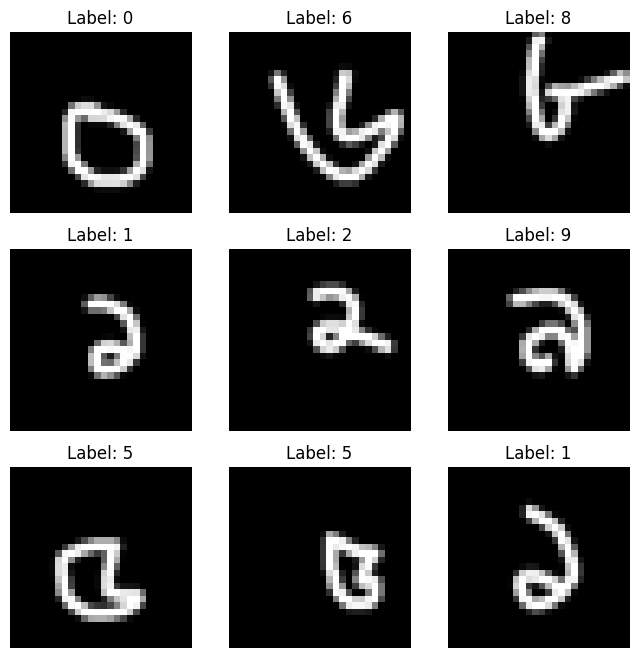

In [4]:
import matplotlib.pyplot as plt
import random

# Assuming X_resized is your resized image dataset
# Assuming y is your corresponding label dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    index = random.randint(0, len(X_resized_gray)-1) # Get random index
    ax.imshow(X_resized_gray[index], cmap='gray') # Show image
    ax.set_title(f"Label: {Y[index]}") # Show corresponding label
    ax.axis('off')
plt.show()

In [5]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X_resized_gray,Y,random_state=0,stratify=Y, test_size = 0.3)
from tensorflow.keras.utils import to_categorical
train_x.shape,test_x.shape,test_y.shape,train_y.shape

((3808, 28, 28), (1632, 28, 28), (1632,), (3808,))

In [6]:
# reshape to be [samples][width][height][channels]
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
train_x= train_x / 255
test_x = test_x / 255
# one hot encode outputs
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
num_classes = test_y.shape[1]

In [8]:
#  CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the k-fold cross-validation generator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model architectures
def create_model_1():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


  # Train and evaluate the model using k-fold cross-validation
all_scores = []
for train_idx, val_idx in kfold.split(train_x):
    train_data, val_data = train_x[train_idx], train_x[val_idx]
    train_labels, val_labels = train_y[train_idx], train_y[val_idx]
    model = create_model_1()
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('Validation accuracy:', val_acc)
    all_scores.append(val_acc)
print('Mean validation accuracy:', np.mean(all_scores))

Validation accuracy: 0.9251968264579773
Validation accuracy: 0.93438321352005
Validation accuracy: 0.9107611775398254
Validation accuracy: 0.9290407299995422
Validation accuracy: 0.9264126420021057
Mean validation accuracy: 0.9251589179039001


In [10]:
# build the model
model = create_model_1()
# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history_1 = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=200, verbose=2,callbacks=[early_stopping])
# Get the training and testing accuracy
train_acc = history_1.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Epoch 1/150
20/20 - 5s - loss: 1.9473 - accuracy: 0.3348 - val_loss: 1.5734 - val_accuracy: 0.4920 - 5s/epoch - 231ms/step
Epoch 2/150
20/20 - 2s - loss: 1.4393 - accuracy: 0.5347 - val_loss: 1.2886 - val_accuracy: 0.5784 - 2s/epoch - 112ms/step
Epoch 3/150
20/20 - 2s - loss: 1.1245 - accuracy: 0.6381 - val_loss: 1.0085 - val_accuracy: 0.6875 - 2s/epoch - 112ms/step
Epoch 4/150
20/20 - 2s - loss: 0.8928 - accuracy: 0.7253 - val_loss: 0.8001 - val_accuracy: 0.7708 - 2s/epoch - 110ms/step
Epoch 5/150
20/20 - 2s - loss: 0.6989 - accuracy: 0.7862 - val_loss: 0.6552 - val_accuracy: 0.8162 - 2s/epoch - 107ms/step
Epoch 6/150
20/20 - 4s - loss: 0.5858 - accuracy: 0.8159 - val_loss: 0.5580 - val_accuracy: 0.8468 - 4s/epoch - 201ms/step
Epoch 7/150
20/20 - 2s - loss: 0.4570 - accuracy: 0.8640 - val_loss: 0.4856 - val_accuracy: 0.8634 - 2s/epoch - 122ms/step
Epoch 8/150
20/20 - 2s - loss: 0.3999 - accuracy: 0.8776 - val_loss: 0.4392 - val_accuracy: 0.8750 - 2s/epoch - 113ms/step
Epoch 9/150
20/2

In [ ]:
model_1=create_model_1()
model_1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 4608)              0         
                                                                 
 dense_36 (Dense)            (None, 124)               571516    
                                                                 
 dropout_18 (Dropout)        (None, 124)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1250      
                                                     

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_1 = model.predict(test_x)
y_pred_labels_1 = np.argmax(y_pred_1, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_1)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_1, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_1, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_1, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_1, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 1s 8ms/step
Accuracy score: 0.9314
Precision score: 0.9322
Recall score: 0.9314
F1 score: 0.9311
AUC ROC score: 0.9954


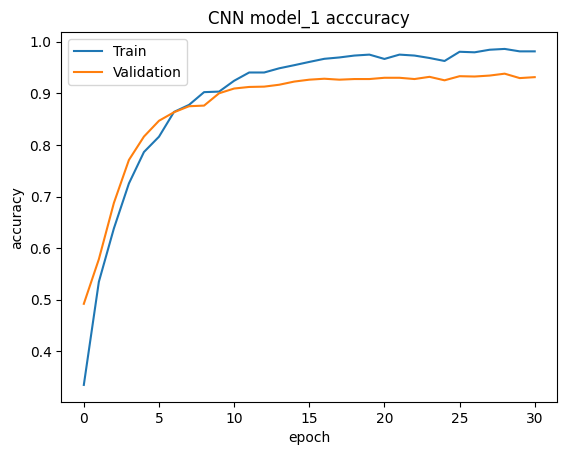

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('CNN model_1 acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

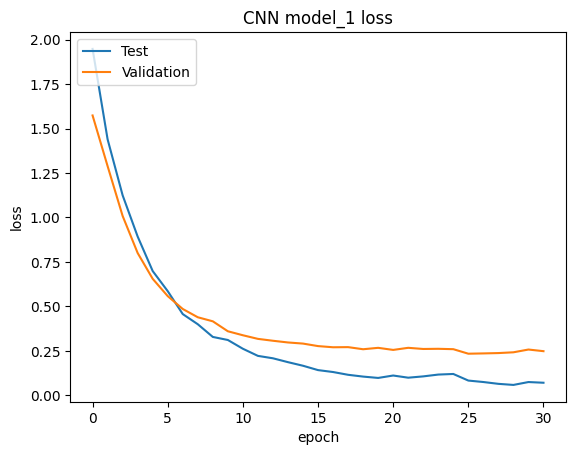

In [13]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('CNN model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [14]:
def create_model_2():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D((3,3)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

 # Train and evaluate the model using k-fold cross-validation
all_scores = []
for train_idx, val_idx in kfold.split(train_x):
    train_data, val_data = train_x[train_idx], train_x[val_idx]
    train_labels, val_labels = train_y[train_idx], train_y[val_idx]
    model = create_model_2()
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('Validation accuracy:', val_acc)
    all_scores.append(val_acc)
print('Mean validation accuracy:', np.mean(all_scores))

Validation accuracy: 0.9501312375068665
Validation accuracy: 0.9540682435035706
Validation accuracy: 0.969816267490387
Validation accuracy: 0.9658344388008118
Validation accuracy: 0.9697766304016113
Mean validation accuracy: 0.9619253635406494


In [15]:
# build the model
model =create_model_2()
# Fit the model
history_2 = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=200, verbose=2,callbacks=[early_stopping])
# Get the training and testing accuracy
train_acc = history_2.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Epoch 1/150
20/20 - 5s - loss: 2.1606 - accuracy: 0.2492 - val_loss: 1.8746 - val_accuracy: 0.3652 - 5s/epoch - 265ms/step
Epoch 2/150
20/20 - 3s - loss: 1.6843 - accuracy: 0.4462 - val_loss: 1.3960 - val_accuracy: 0.5533 - 3s/epoch - 143ms/step
Epoch 3/150
20/20 - 4s - loss: 1.2527 - accuracy: 0.5851 - val_loss: 1.0396 - val_accuracy: 0.6765 - 4s/epoch - 179ms/step
Epoch 4/150
20/20 - 5s - loss: 0.9372 - accuracy: 0.6912 - val_loss: 0.7832 - val_accuracy: 0.7672 - 5s/epoch - 236ms/step
Epoch 5/150
20/20 - 3s - loss: 0.7235 - accuracy: 0.7713 - val_loss: 0.5776 - val_accuracy: 0.8346 - 3s/epoch - 149ms/step
Epoch 6/150
20/20 - 3s - loss: 0.5367 - accuracy: 0.8283 - val_loss: 0.4794 - val_accuracy: 0.8621 - 3s/epoch - 143ms/step
Epoch 7/150
20/20 - 3s - loss: 0.4377 - accuracy: 0.8621 - val_loss: 0.4080 - val_accuracy: 0.8707 - 3s/epoch - 163ms/step
Epoch 8/150
20/20 - 5s - loss: 0.3772 - accuracy: 0.8779 - val_loss: 0.3250 - val_accuracy: 0.9124 - 5s/epoch - 263ms/step
Epoch 9/150
20/2

In [ ]:
model_2=create_model_2()
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_2 = model.predict(test_x)
y_pred_labels_2 = np.argmax(y_pred_2, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_2)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_2, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_2, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_2, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_2, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 1s 10ms/step
Accuracy score: 0.9700
Precision score: 0.9704
Recall score: 0.9700
F1 score: 0.9700
AUC ROC score: 0.9992


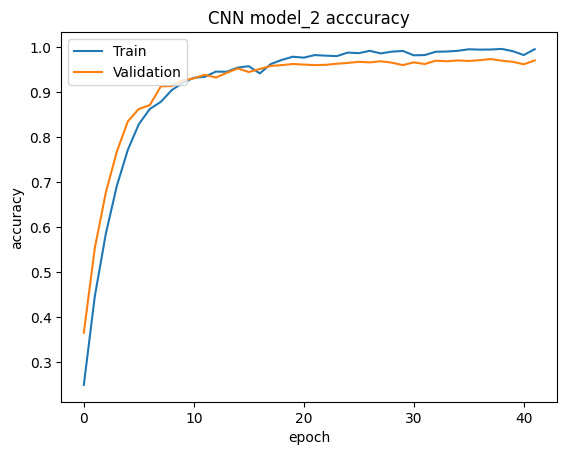

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('CNN model_2 acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

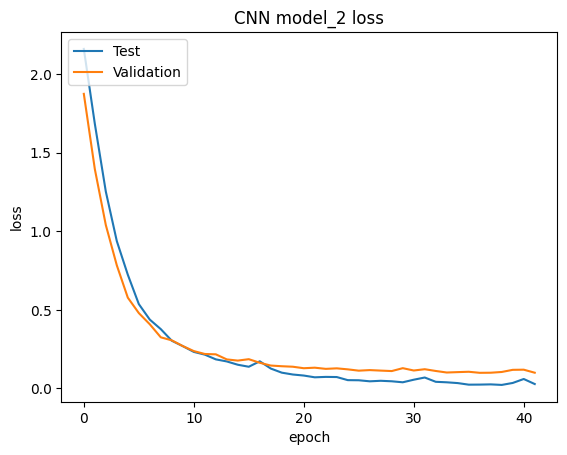

In [18]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('CNN model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [19]:
def create_model_3():
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Train and evaluate the model using k-fold cross-validation
all_scores = []
for train_idx, val_idx in kfold.split(train_x):
    train_data, val_data = train_x[train_idx], train_x[val_idx]
    train_labels, val_labels = train_y[train_idx], train_y[val_idx]
    model = create_model_3()
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('Validation accuracy:', val_acc)
    all_scores.append(val_acc)
print('Mean validation accuracy:', np.mean(all_scores))

Validation accuracy: 0.9553805589675903
Validation accuracy: 0.9527559280395508
Validation accuracy: 0.943569540977478
Validation accuracy: 0.9421813488006592
Validation accuracy: 0.9513797760009766
Mean validation accuracy: 0.949053430557251


In [20]:
# build the model
model = create_model_3()
# Fit the model
history_3 = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=200, verbose=2,callbacks=[early_stopping])
# Get the training and testing accuracy
train_acc = history_3.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Epoch 1/150
20/20 - 7s - loss: 2.0573 - accuracy: 0.2915 - val_loss: 1.6551 - val_accuracy: 0.4479 - 7s/epoch - 337ms/step
Epoch 2/150
20/20 - 7s - loss: 1.4861 - accuracy: 0.4947 - val_loss: 1.1758 - val_accuracy: 0.6103 - 7s/epoch - 374ms/step
Epoch 3/150
20/20 - 5s - loss: 1.0386 - accuracy: 0.6499 - val_loss: 0.8315 - val_accuracy: 0.7365 - 5s/epoch - 259ms/step
Epoch 4/150
20/20 - 6s - loss: 0.7674 - accuracy: 0.7474 - val_loss: 0.6319 - val_accuracy: 0.7960 - 6s/epoch - 323ms/step
Epoch 5/150
20/20 - 6s - loss: 0.5757 - accuracy: 0.8080 - val_loss: 0.4654 - val_accuracy: 0.8536 - 6s/epoch - 293ms/step
Epoch 6/150
20/20 - 5s - loss: 0.4431 - accuracy: 0.8598 - val_loss: 0.3807 - val_accuracy: 0.8934 - 5s/epoch - 261ms/step
Epoch 7/150
20/20 - 7s - loss: 0.3528 - accuracy: 0.8816 - val_loss: 0.3279 - val_accuracy: 0.9056 - 7s/epoch - 371ms/step
Epoch 8/150
20/20 - 5s - loss: 0.3631 - accuracy: 0.8866 - val_loss: 0.3294 - val_accuracy: 0.8940 - 5s/epoch - 259ms/step
Epoch 9/150
20/2

In [ ]:
model_3=create_model_3()
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 800)               0         
                                                                 
 dense_36 (Dense)            (None, 256)             

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_3 = model.predict(test_x)
y_pred_labels_3 = np.argmax(y_pred_3, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_3)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_3, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_3, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_3, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_3, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 1s 18ms/step
Accuracy score: 0.9559
Precision score: 0.9569
Recall score: 0.9559
F1 score: 0.9560
AUC ROC score: 0.9983


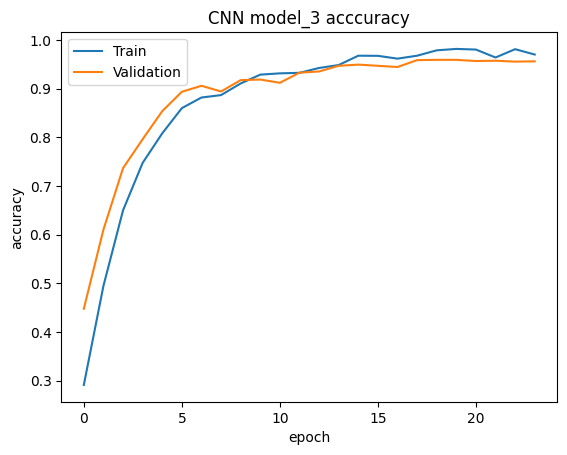

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('CNN model_3 acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

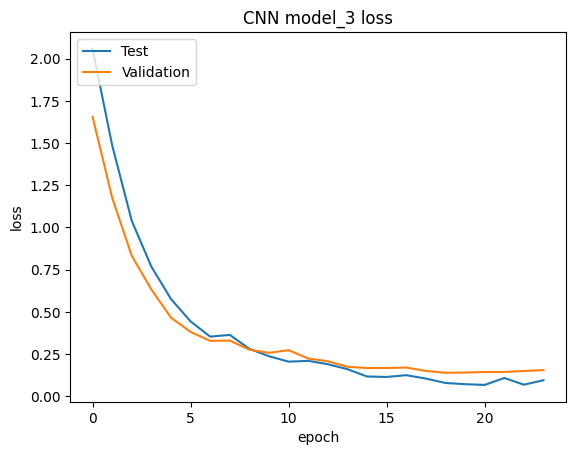

In [23]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('CNN model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import StackingClassifier
from keras.layers import Input, Dense, Dropout, Concatenate
from keras.models import Model
from keras.utils import to_categorical

In [31]:

# Define the stacking ensemble model
def create_ensemble():
    # Create the submodels
    models = [create_model_1(), create_model_2(), create_model_3()]
    # Define the input layer
    input_layer = Input(shape=(28, 28, 1))
    # Define the output of each submodel for the input layer
    outputs = [model(input_layer) for model in models]
    # Define the concatenated output
    merge = Concatenate()(outputs)
    # Define the dense layers
    merge = Dense(300, activation='relu')(merge)
    merge = Dropout(0.3)(merge)
    merge = Dense(256, activation='relu')(merge)
    merge = Dropout(0.25)(merge)
    output_layer = Dense(10, activation='softmax')(merge)
    # create the ensemble model
    model_st = Model(inputs=input_layer, outputs=output_layer)
    # compile the model
    model_st.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_st

# Train the stacking ensemble model on the training set
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model = create_ensemble()
history_stack=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=128, validation_split=0.1,verbose=2,callbacks=[early_stopping])

# Evaluate the stacking ensemble model on the test set
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy: ", accuracy)

Epoch 1/150
30/30 - 15s - loss: 2.2377 - accuracy: 0.1954 - val_loss: 2.0277 - val_accuracy: 0.3033 - 15s/epoch - 502ms/step
Epoch 2/150
30/30 - 11s - loss: 1.6375 - accuracy: 0.4236 - val_loss: 1.2280 - val_accuracy: 0.5625 - 11s/epoch - 373ms/step
Epoch 3/150
30/30 - 14s - loss: 0.9463 - accuracy: 0.6478 - val_loss: 0.6368 - val_accuracy: 0.7739 - 14s/epoch - 463ms/step
Epoch 4/150
30/30 - 10s - loss: 0.5628 - accuracy: 0.8033 - val_loss: 0.4239 - val_accuracy: 0.8523 - 10s/epoch - 346ms/step
Epoch 5/150
30/30 - 12s - loss: 0.3689 - accuracy: 0.8763 - val_loss: 0.3094 - val_accuracy: 0.9044 - 12s/epoch - 387ms/step
Epoch 6/150
30/30 - 12s - loss: 0.2664 - accuracy: 0.9097 - val_loss: 0.2896 - val_accuracy: 0.9026 - 12s/epoch - 397ms/step
Epoch 7/150
30/30 - 9s - loss: 0.1957 - accuracy: 0.9322 - val_loss: 0.2155 - val_accuracy: 0.9301 - 9s/epoch - 312ms/step
Epoch 8/150
30/30 - 11s - loss: 0.1771 - accuracy: 0.9388 - val_loss: 0.2133 - val_accuracy: 0.9301 - 11s/epoch - 383ms/step
Ep

In [32]:
model_stack=create_ensemble()
model_stack.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential_27 (Sequential)     (None, 10)           573598      ['input_3[0][0]']                
                                                                                                  
 sequential_28 (Sequential)     (None, 10)           151306      ['input_3[0][0]']                
                                                                                                  
 sequential_29 (Sequential)     (None, 10)           226730      ['input_3[0][0]']                
                                                                                            

In [33]:
# Get the training and testing accuracy
train_acc = history_stack.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.9884454011917114
Testing accuracy: 0.9607843160629272


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_st = model.predict(test_x)
y_pred_labels_st = np.argmax(y_pred_st, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_st)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_st, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_st, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_st, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_st, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 3s 56ms/step
Accuracy score: 0.9608
Precision score: 0.9619
Recall score: 0.9608
F1 score: 0.9608
AUC ROC score: 0.9987


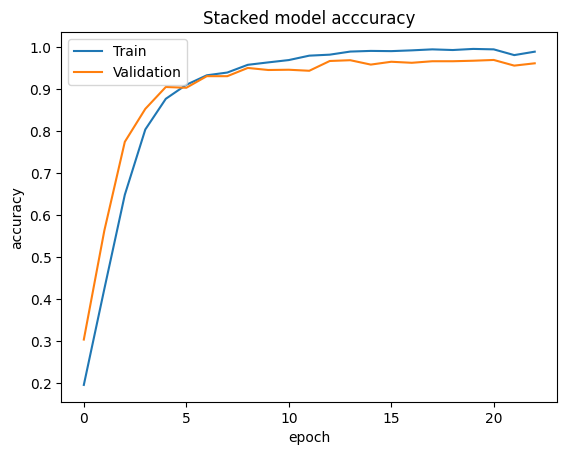

In [35]:
# summarize history for accuracy
plt.plot(history_stack.history['accuracy'])
plt.plot(history_stack.history['val_accuracy'])
plt.title('Stacked model acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

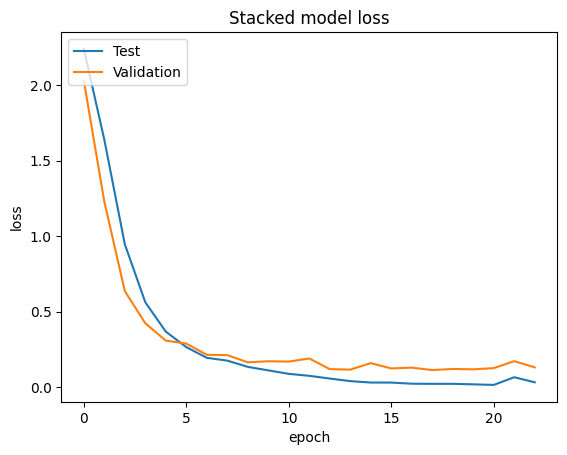

In [36]:
# summarize history for loss
plt.plot(history_stack.history['loss'])
plt.plot(history_stack.history['val_loss'])
plt.title('Stacked model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()